# GENYUS
# Gombas Owen & Darmanger David, juin 2021

<br><br>

# INTRODUCTION

C’est dans le cadre de notre cours de python (1242.4 PYTHON) que nous avons effectué ce projet. L’objectif du travail était de prendre en main le langage python et d’avoir une première introduction à l’analyse de données grâce aux outils fournis par le langage. Mais également une prise en main de l’utilisation de notebooks jupyter pour la mise en place du projet.

En ce qui concerne le travail en lui-même, notre projet est un outil d’analyse du “vocabulaire” utilisé dans le rap francophone. Pour être plus précis, on va analyser les paroles d’un échantillon de chansons de rap francophones de ces 20-30 dernières années et les utiliser pour effectuer plusieurs statistiques. Nous avons dans un premier temps délibérément choisi de nous limiter uniquement à des musiques de rap car selon nous, c'est le genre de musique qui jouit de la plus grande diversité de langage et qui a le plus évolué dans le temps durant ces dernières années.

Exemples de statistiques:

    1) Afficher les mots français les plus utilisés, les mots anglais les plus utilisés mais également les mots les plus utilisés du jargon qui ne figure pas officiellement dans le dictionnaire français.
    2) Analyse de quels artistes ont les textes les plus variés en termes de vocabulaire.
    3) Le pourcentage d’utilisation d’un mot particulier sur l’ensemble des chansons ou encore son pourcentage d’utilisation au cours des différentes années. 

<br>

## API et services utilisés

En ce qui concerne le choix de notre échantillon nous avons effectué une playlist avec un total de 1847 titres différents pour un total de 109h50min de chanson en continue. Nous avons ensuite exporté le nom des musiques et les artistes qui leurs sont associés en un fichier texte, qui sera utilisé pour la récupération des données. Une partie seulement de toutes les chansons seront utilisés en raison de l’API utilisé.
Afin de récupérer les données nécessaires au projet, nous avons besoin de : 


## 1) [Spotify](https://www.spotify.com/fr/)
Grâce Spotify on va facilement pouvoir regrouper les chansons qui nous intéresse.
La playlist utilisée dans le cadre du projet : https://open.spotify.com/playlist/3bp6rWaNssiLhZP431bkU7?si=a5f19a02267a4101
<br>

## 2) [Tune My Music](https://www.tunemymusic.com/fr/Spotify-to-File.php)
Ce site permet d'exporter une playlist dans un fichier texte simple au format:
```
Artist - Titre 1
Artist - Titre 2
Artist 2 - Titre 2.2
```
## 3) [Genius](https://genius.com)
Genius est un site fournissant les paroles de musiques, et c'est l'API de ce site que l'on a utilisé afin d'obtenir des informations relative à la musique.

### Fonctionnalités de l'API
Nous avons principalement utilisé que deux fonctionnalités de l'API:
- Recherche globale de musiques, d'artistes ou d'albums
- Récupération des informations d'une musique, d'un artiste ou d'un album

### Récupération des paroles
Malheureusement l'API ne nous fournit pas la possibilité d'obtenir les paroles, on va devoir "scraper" les données avec `beautifulsoup` qui est un module python.

<br><br>

### Statistiques principales - TODO


Donc le but général du projet est de présenter à l'aide de différentes statistiques l'utilisation la variété des mots utilisés dans les chansons de rap.









# CORPS DU TRAVAIL

# Traitement et analyse de la liste des musiques avant récupération
Ici le but est de traiter, nettoyer et analyser les données que l'on a en entré pour notre analyse. Ces données représentent une liste de musiques avec leur artistes (datas/songs.txt)

## Paquets utilisés

In [3]:
import pandas as pd

## Suppression des doublons
Nous devons supprimer les éventuels doublons qui existent dans cette liste afin d'éviter de fausser nos résultats

In [4]:
songs: pd.Series

print("Removing duplicated songs...", "\n\n")

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    # Read the songs.txt file and create a pandas Serie from it
    songs_inputs = file.read().splitlines()
    songs = pd.Series(songs_inputs)

    print("Before", "\n", songs, "\n", "...", "\n\n")
    
    # Remove duplicated songs (keep the first)
    songs.drop_duplicates(inplace=True)

    print("After", "\n", songs, "\n", "...")

    # Rewrite the file without the duplicated values  
    with open("./datas/songs.txt", "w", encoding="utf8") as file:
        file.write("\n".join(songs))
        file.close()

    file.close()

Removing duplicated songs... 


Before 
 0                 Josman - F*cked Up 4
1                        Josman - Doré
2                   Josman - Décisions
3                         Josman - SEC
4       Josman - New Hares (Same Sh!t)
                     ...              
1825                    Di-Meh - Gâtée
1826                 Di-Meh - Week-end
1827                Di-Meh - Full Drip
1828                  Di-Meh - Daytona
1829         Di-Meh - 4x4 Diplomatique
Length: 1830, dtype: object 
 ... 


After 
 0                 Josman - F*cked Up 4
1                        Josman - Doré
2                   Josman - Décisions
3                         Josman - SEC
4       Josman - New Hares (Same Sh!t)
                     ...              
1825                    Di-Meh - Gâtée
1826                 Di-Meh - Week-end
1827                Di-Meh - Full Drip
1828                  Di-Meh - Daytona
1829         Di-Meh - 4x4 Diplomatique
Length: 1830, dtype: object 
 ...


## Représentation des artistes
On va grouper les musiques par artistes, c'est à dire que pour chaque artiste nous faisons correspondre la liste de toutes ses musiques

In [5]:
# Split each lines using " - " (only the first occurence)
# "Green Montana - Follow-moi" => ["Green Montana", "Follow-moi"]
df_songs = songs.str.split(" - ", expand=True, n=1)
df_songs.columns = ["artist", "song"]

# Group the songs by artists
df_artists_songs = df_songs.groupby("artist")["song"].apply(list).reset_index(name="songs")
df_artists_songs["songs_count"] = df_artists_songs["songs"].apply(lambda x: len(x))
df_artists_songs.sort_values(by="songs_count", inplace=True, ascending=False)

df_artists_songs

,artist,songs,songs_count
46,PNL,"[DA, Naha, Dans la légende, Mira, J'suis QLF, ...",70
40,Nekfeu,"[Les étoiles vagabondes, Alunissons, Cheum, Na...",68
51,SCH,"[Gibraltar, Marché noir, Fournaise, Aluminium,...",67
10,Damso,"[Ο. OG, Π. VANTABLACK, Ρ. DOSE, Σ. MOROSE, Τ. ...",58
35,Lomepal,"[Palpal, 70, Lucy, Pommade, Ray Liotta, Ça com...",56
...,...,...,...
28,Kery James,"[Si c'était à refaire, Parce que, Ce""A""d'avili...",12
22,Jazzy Bazz,"[Crépuscule, El Presidente, Éternité, Leticia,...",12
30,Krisy,"[Vol vers, Discussion nocturne, Blessed, Parad...",9
56,Swing,"[N., Brousse, S'en aller, Pas besoin de raison...",7


## Histogramme des artistes depuis la liste (nettoyées) des musiques 
Nous pouvons maintenant afficher un histogramme depuis la liste (nettoyée) des musiques pour y voir plus clair, on affiche alors chacun de nos artistes avec son nombre de musiques que l'on possède

<AxesSubplot:xlabel='artist'>

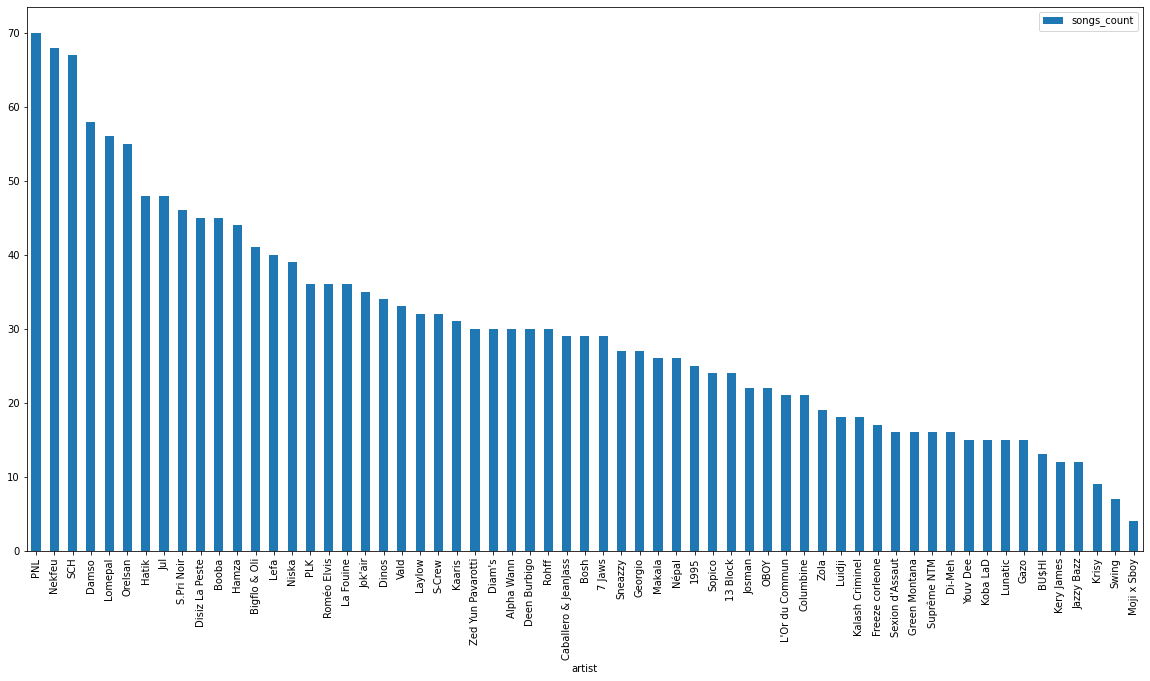

In [6]:
df_artists_songs.plot(kind="bar", x="artist", y="songs_count", figsize=(20, 10))

# Récupération des informations des musiques
Cette partie consiste à la récupération des données via l'API Genius, dans a partie précédente nous avons traité de la partie qui s'occupe des entrées de notre programme. Ici on va justement utiliser cette liste brute de musiques pour récupérer les paroles ainsi que notre information utilise relative à chacune des musiques.  
- Les informations liées à l'artiste
- Les informations liées à l'album où la musique apparait
- Les parole de la musique

## Documentation
La documentation de l'API Genius se trouve [ici](https://docs.genius.com/)

## Le scraping de données
Malheureusement Genius ne fournit pas les paroles via son API, on doit alors ruser... La solution est la suivante:  
- On récupère l'URL de la page affichant les paroles via car l'API nous le fournit  
- On fait une requête GET (HTTP) à cette adresse pour récupérer toutes la page HTML affichant les paroles
- Grâce au module BeautifulSoup on extrait uniquement le contenu de la balise HTML contenant les paroles de la musique

## Paquets utilisés

In [7]:
import json
import requests
import time
import re
import pandas as pd
from datetime import datetime
from typing import List, Any
from rauth import OAuth2Service
from bs4 import BeautifulSoup, PageElement
from IPython.display import clear_output

## Classe pour la manipulation de l'API
Une classe nous simplifie grandement les appels à l'API Genius, nous avons alors fait une classe qui sert à:
- Faire une recherche via l'API
- Récupérer les informations spécifiques à une musique
- Scraper les paroles de la musique

In [8]:
class API:
    """
    Simplify the requests to the Genius API
    """
    genius: Any
    session: Any

    def __init__(
        self,
        client_id: str,
        client_secret: str,
        authorize_url: str,
        base_url: str,
        token: str,
    ):
        """
        Initialize the Genius API session
        """
        self.genius = OAuth2Service(
            client_id=client_id,
            client_secret=client_secret,
            authorize_url=authorize_url,
            base_url=base_url
        )

        self.session = self.genius.get_session(
            token=token
        )

    def get_lyrics(
        self,
        url: str,
        retry: bool = False,
        wait_retry: int = 30,
        wait: int = 0
    ) -> dict:
        """
        Get the lyrics from the Genius website

        Parameters:
            url (str): The lyrics page URL
            retry (bool): Retry the request if it fails (default False)
            wait_retry (int): Wait x seconds before retrying (default 30)
            wait (int): Wait x seconds before returning the result (default 0)

        Returns:
            lyrics (str or None): The lyrics of the song
        """

        htmlRes = requests.get(url).text

        html = BeautifulSoup(htmlRes, "html.parser")

        # Find the correct lyrics div in the html file.
        # The classname could be "lyrics" or "Lyrics__Root-sc-1ynbvzw-0" 
        # Because the website stack probably use React or Angular with Server Side Rendering
        lyricsDiv: PageElement = html.find("div", class_="lyrics")
        if lyricsDiv == None:
            lyricsDiv = html.find("div", class_="Lyrics__Root-sc-1ynbvzw-0")

        if lyricsDiv != None:
            # We do not want <br>, so we simply replace each occurence with a line return (\n)
            # (could be replaced by a space, because we normalize it just after)
            for br in lyricsDiv.find_all("br"):
                br.replace_with("\n") 

            lyrics: str = lyricsDiv.get_text()

            # We normalize the lyrics by replacing each \n by a simple space (" ")
            # We do not want more than one space between each word so replace chained spaces by a single one ("a    b" => "a b")
            # And finally we remove spaces at the beginning 
            lyrics = re.sub(r"\n", " ", lyrics)
            lyrics = re.sub(r"\s{2,}", " ", lyrics)
            lyrics = lyrics.strip()

            # Optionnaly wait to avoid a ban from Genius's API
            time.sleep(wait)

            return lyrics

        elif retry:
            # Retry if it failed
            print(f"Cannot scrap lyrics... waiting {wait_retry} secondes")
            time.sleep(wait_retry)
            return self.get_lyrics(url, retry, wait_retry, wait)

        return None

    def get_song(
        self,
        id: int,
        with_lyrics: bool = False,
        retry: bool = False,
        wait_retry: int = 30,
        wait: int = 0
    ) -> dict:
        """
        Get a song from the Genius API and parse it into objects (selecting only interesting fields)

        Parameters:
            id (int): The song's ID
            with_lyrics (bool): Get the song with it's lyrics (default False)
            retry (bool): Retry the request if the getting lyrics method failed (default False)
            wait_retry (int): Wait x seconds if the getting lyrics method failed (default 30)
            wait (int): Wait x seconds after the lyrics method (default 0)

        Returns:
            lyrics (dict): The song
        """

        res = self.session.get(f"songs/{id}?text_format=plain").json()
        url = res['response']['song']['url']
        lyrics = ""

        album: dict = None

        # Extract only interesting informations about the song
        if res['response']['song']['album']:
            album = {
                "name": res['response']['song']['album']['name'],
                "id": res['response']['song']['album']['id']
            }            

        artist = {
            "name": res['response']['song']['primary_artist']['name'],
            "id": res['response']['song']['primary_artist']['id'],
            "url": res['response']['song']['primary_artist']['url'],
            "image": res['response']['song']['primary_artist']['image_url']
        }

        song = {
            "id": res['response']['song']['id'],
            "name": res['response']['song']['title'],
            "album": album,
            "artist": artist,
            "image": res['response']['song']['header_image_url'],
            "url": url,
            "original_lyrics": lyrics,
            "date": datetime.strptime(
                res['response']['song']['release_date'] or "1900-01-01", "%Y-%m-%d").isoformat()
        }

        if with_lyrics:
            lyrics = self.get_lyrics(url, retry, wait_retry, wait)

        if lyrics != None:
            song["original_lyrics"] = lyrics

        return song

    def search(self, query: str) -> List[dict]:
        """
        Search for an album, artist, song in the Genius API

        Parameters:
            query (str): The search query

        Returns:
            Results (List[dict]): The provided results
        """

        search = self.session.get(f"search?q={query}").json()
        hits = search['response']['hits']
        results: List[dict] = []

        for hit in hits:
        # Extract only interesting informations about the searched song
            hitResult = hit['result']

            artist = {
                "name": hitResult['primary_artist']['name'],
                "id": hitResult['primary_artist']['id'],
                "image": hitResult['primary_artist']['image_url'],
                "url": hitResult['primary_artist']['url']
            }

            search = {
                "title": hitResult['title'],
                "url": hitResult['url'],
                "artist": artist,
                "id": hitResult['id']
            }

            results.append(search)

        return results

    def print_json(content: str):
        print(json.dumps(content, indent=2, sort_keys=True))

## Authentification à l'API
Afin de faire des requêtes à l'API nous devons nous authentifier avec un token OAuth  
Ce token peut être généré à l'adresse suivante: [https://genius.com/api-clients](https://genius.com/api-clients)

In [9]:
# For the demo we let the tokens on purpose but we should avoid doing that
api = API(
    client_id="xAP0jvOkLrC3eAjwE4iCeY5BdSrgH7qKUQyh8907-2fGiAGYEHJMNhtFglSLznAq",
    client_secret="WIVq7t1Jq5uaN0OkYCPzhVMr4mt_d-ufoq5fSC6qmyUaxodx5kZ4bS56J87C-LXGRqeeXp9nFpjgrgPtZ_8niA",
    authorize_url="https://api.genius.com/oauth/authorize",
    base_url="https://api.genius.com/",
    token="qfhBonIalyiGK0DcsHmg3-heXf485c1dSV-gOM3ZU4Wn3eD-6-pKjESnhYg4kJ1y"
)

## Récupération d'une musique avec l'API Genius

In [10]:
song = api.get_song(1)
API.print_json(song)

{
  "album": {
    "id": 360842,
    "name": "Purple Haze (Advance)"
  },
  "artist": {
    "id": 1,
    "image": "https://images.genius.com/923801a14122014b9991a84a820f061c.420x420x1.png",
    "name": "Cam\u2019ron",
    "url": "https://genius.com/artists/Camron"
  },
  "date": "2004-12-07T00:00:00",
  "id": 1,
  "image": "https://images.rapgenius.com/bf520db552b4637bd9a8bbd072d9d290.316x314x1.jpg",
  "name": "Killa Cam",
  "original_lyrics": "",
  "url": "https://genius.com/Camron-killa-cam-lyrics"
}


## Recherche d'une musique avec l'API Genius

In [11]:
results = api.search("damso")
API.print_json(results)

[
  {
    "artist": {
      "id": 45855,
      "image": "https://images.genius.com/57aa49f445bb856c82f4a8e6e5bffe55.1000x1000x1.jpg",
      "name": "Damso",
      "url": "https://genius.com/artists/Damso"
    },
    "id": 3756041,
    "title": "Feu de bois",
    "url": "https://genius.com/Damso-feu-de-bois-lyrics"
  },
  {
    "artist": {
      "id": 45855,
      "image": "https://images.genius.com/57aa49f445bb856c82f4a8e6e5bffe55.1000x1000x1.jpg",
      "name": "Damso",
      "url": "https://genius.com/artists/Damso"
    },
    "id": 2685480,
    "title": "Amn\u00e9sie",
    "url": "https://genius.com/Damso-amnesie-lyrics"
  },
  {
    "artist": {
      "id": 45855,
      "image": "https://images.genius.com/57aa49f445bb856c82f4a8e6e5bffe55.1000x1000x1.jpg",
      "name": "Damso",
      "url": "https://genius.com/artists/Damso"
    },
    "id": 3038927,
    "title": "\u0393. Mosa\u00efque solitaire",
    "url": "https://genius.com/Damso-mosaique-solitaire-lyrics"
  },
  {
    "artist":

## Récupération des paroles d'une musique

In [12]:
lyrics = api.get_lyrics(song["url"])
lyrics

'[Chorus: Opera Steve & Cam\'ron] Killa Cam, Killa Cam, Cam Killa Cam, Killa Cam Killa Cam, Cam Killa Cam, Killa Cam, Cam Killa Killa Killa Cam Killa Cam, Cam, Killa (Killa!) Killa Cam, Killa Cam, Cam (Bases loaded) Killa Cam, Killa Cam (Uh-huh) Killa Cam, Cam (Santana on second, Jim on third) Killa Cam, Killa Cam, Cam (I\'m at bat) Killa Killa Killa Cam Killa Cam, Cam, Killa (I\'m \'bout to hit this shit out the world) Killa Cam (Ugh, Heatmakerz), Killa Cam, Cam Killa Cam, Killa Cam Killa Cam, Cam (Hahahaha) Killa Cam, Killa Cam, Cam Killa Killa Killa Cam Killa Cam, Cam, Killa (Clap) Killa Cam, Killa Cam, Cam Killa Cam, Killa Cam Killa Cam, Cam Killa Cam, Killa Cam, Cam Killa Killa Killa Cam (Killa! Killa!) Killa Cam, Cam, Killa [Verse 1] With the goons I spar, stay in tune with ma (What up?) She like, "Damn, this the realest since \'Kumbaya\'" Bomaye, Killa Cam, my Lord (My Lord) Still the man with the pan, scrilla, fam, on board Now bitches, they want to neuter me, niggas, they want

## Scraping des données
Récupération de toutes les musiques d'un à partir du fichier contenant les musiques (datas/songs.txt)  
**Le code n'est pas exécuté (la fonction `scrap` n'est pas appelée, car commentée), cette opération peut durer plusieurs heures. Nous avons déjà effectué ce scraping afin de nourrir notre fichier songs.json, qui représente entre-autre notre base de données des musiques**

Comme nous l'avons déjà détaillé, les opérations suivantes pour chacune des musiques sont effectuées pour scraper les paroles

- On utilise la méthode de recherche de la classe API (`api.search`)

- Si des résultats sont donnés, on opère uniquement sur le premier résultat (qui est probablement celui qui nous intéresse) on récupéré les informations de ce résultat ("hit") qui représente la musique pas dans sa totalité, c'est la raison pour laquelle on fait cette opération  (`api.get_song`)  
Cette opération va également récupérer les paroles de la musique directement (grâce aux argument passés à la méthode)

- On ajoute cete musique dans une liste de résultats et on exporte cette liste en JSON dans le fichier `api_songs.json`

> On exporte le fichier à chaque itération car si la boucle est interrompue par une erreur on peut quand même récupérer la liste des musiques qui ont été récupérées

In [13]:
input_path: str = "./datas/songs.txt"
output_path: str = "./datas/api_songs.json"

def scrap():
    with open(input_path, "r", encoding="utf8") as file:
        songs_inputs = file.read().splitlines()
        songs: List[str] = []
      
        for index, song_input in enumerate(songs_inputs, start=1):
            # Search for a song with a query for example: "Green Montana - CALIFORNIA"
            results = api.search(song_input)

            # Retrieve all the songs informations and lyrics of the first result
            # (the first result is the one that we are interested in)
            if len(results) > 0:
                song = api.get_song(results[0]["id"], True, True, 0, 0)
                songs.append(song)

                print(f"{index / len(songs_inputs) * 100:.2f}%     {song['artist']['name']} - {song['name']}")
            
            # Write the file in JSON format at api_songs.json
            with open(output_path, "w", encoding="utf8") as output:
                output.write(
                    json.dumps(
                        songs,
                        default=lambda obj: obj.__dict__,
                        ensure_ascii=False
                    )
                )
                output.close()
        file.close()

    print("Output written at", output_path)

# We avoid calling this function because it can easily last few hours
# The result of our songs list is already in the file api_songs.json
# scrap()

# Clean des sons après récupération
On ne peut pas se fier complètement à la recherche de l'API Genius, pour deux raisons:

- Le son peut potentiellement ne pas exister dans la base de données de Genius

- Le premier résultat n'est pas forcément le bon, on proposition d'amélioration aurait pu d'être de parcourir tous les résultats d'une recherche et vérifier si la musique recherchée n'apparait pas comme le deuxième, troisième, ..., résultat

Pour ces raisons nous allons filtrer que les musique qui étaient bel et bien dans notre liste de musique au départ

## Paquets utilisés

In [14]:
import json
import re
import pandas as pd
from typing import List

## Application du tri
En entrée on va prendre le fichier comportant la liste des musiques que l'on a scrapé auparavant (`api_songs.json`) et on va en premier temps vérifier, pour chacune des musiques, qu'elle existant au départ dans notre liste de sons brute (`songs.txt`) en recréant un champ `Artiste - Titre de musique` à partir des informations réel de la musique. En deuxième temps, nous allons simplement supprimer tous les potentiels doublons qui pourrait apparaitre dans notre liste. Pour finalement afficher le pourcentage de musique que l'on peut exploiter.

In [15]:
input_path = "./datas/api_songs.json"
output_path = "./datas/songs.json"

songs = pd.read_json(input_path)
inputs: pd.Series

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    inputs = pd.Series(file.read().lower().splitlines())
    file.close()

# We recreate the field "Artist - Title" in the DataFrame
songs["artist_name"] = songs['artist'].apply(pd.Series)["name"]
songs["query"] = songs['artist_name'].str.lower() + " - " + songs['name'].str.lower()

# We verify that the song exists in the file songs.txt
songs["is_in_inputs"] = songs["query"].isin(inputs)

# We filter the songs and remove the songs that aren't the the file songs.txt
songs = songs[songs["is_in_inputs"] == True]

# We remove the duplicated songs
songs.drop_duplicates(subset=["id"], inplace=True)

del songs["is_in_inputs"]
del songs["artist_name"]

print(f"With {len(inputs)} songs, Genius provided {len(songs)} correct songs")
print(f"We keep {len(songs) / len(inputs) * 100:.2f}% of the songs")

songs

With 1830 songs, Genius provided 1268 correct songs
We keep 69.29% of the songs


,id,name,album,artist,image,url,original_lyrics,date,query
0,6408722,F*cked Up 4,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/5d1737204d5b010efc28...,https://genius.com/Josman-fcked-up-4-lyrics,"[Paroles de ""F*cked Up 4""] [Intro] J.O.S J.O.S...",2021-01-28T00:00:00,josman - f*cked up 4
1,6408724,Doré,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-dore-lyrics,"[Paroles de ""Doré""] [Refrain] Le ciel est doré...",2021-01-29T00:00:00,josman - doré
2,6408725,Décisions,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-decisions-lyrics,"[Paroles de ""Décisions""] [Couplet 1] J'peux pa...",2021-01-29T00:00:00,josman - décisions
3,6408726,SEC,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-sec-lyrics,"[Paroles de ""SEC""] [Intro] Sec comme le miel, ...",2021-01-29T00:00:00,josman - sec
4,6408727,New Hares (Same Sh!t),"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-new-hares-same-sh-t-...,"[Paroles de ""New Hares (Same Sh!t)""] [Couplet ...",2021-01-29T00:00:00,josman - new hares (same sh!t)
...,...,...,...,...,...,...,...,...,...
1813,6708599,Follow,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-follow-lyrics,"[Paroles de ""Follow""] [Refrain] Ouais j'y vais...",2021-05-14T00:00:00,di-meh - follow
1815,6708601,Turn Up,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-turn-up-lyrics,"[Paroles de ""Turn Up""] [Intro] Hmm Yeah Hmm [R...",2021-05-14T00:00:00,di-meh - turn up
1816,6708602,Gâtée,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-gatee-lyrics,"[Paroles de ""Gâtée""] [Refrain] Dis-moi pourquo...",2021-05-14T00:00:00,di-meh - gâtée
1817,6708603,Week-end,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-week-end-lyrics,"[Paroles de ""Week-end"" ft. Klench Poko] RETRAN...",2021-05-14T00:00:00,di-meh - week-end


## Création de plusieurs champs dérivé des paroles originales
Nous allons avoir besoin de plusieurs variations des paroles afin de procéder à nos statistiques.  
Notamment pour analyser grâce un dictionnaire de mots d'une langue les mots existant dans cette langue (`lyrics_keywords`)

### `original_lyrics`
Les paroles originales, celles récupérées sur le site [genius.com](https://genius.com)

### `lyrics`
Les paroles sans: `[Couplet]`, `mot94`, `34`, `  `
- Supprime les accolades et leur contenu "\[...]"
- Supprime toutes les parenthèses et leur contenu
- Supprime tous ce qui n'est pas une lettre, une apostrophe ou un tirait (a-Z, ', -)
- Supprime les lettres seules "abc d efg" => "abc efg"
- Remplace plusieurs espaces par un seul "abc   def" => "abc def"

### `lyrics_keywords`
Les paroles utilisées pour être comparée avec un dictionnaire, elles sont normalisées à leur forme la plus simple, effectue le même nettoyage que pour le champ `lyrics` mais sans les mot basé sur des apostrophes, les apostrophes, les tirait, etc...

In [16]:
# 1. Remove: "[...]"
# 2. Remove all the brackets and their contents "(...)"
# 3. Remove everything that is not a letter (a-Z) a word letter a single quote "'" or a "-"
# 4. Remove alone letters "abc d efg" => "abc efg"
# 5. Replace chained spaces by a single one "abc   def" => "abc def"
def clean_lyrics(lyrics: str):
    lyrics = re.sub(r"\([^()]*\)", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"\s*\[(.*?)\]\s*", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"[^a-zA-Z \w ' -]", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"\w*\d\w*", "", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"\s{2,}", " ", lyrics, flags=re.M | re.I)
    lyrics = lyrics.strip().lower()

    return lyrics

# Clean the lyrics like clean_lyrics does
# but it remove also the letters/words that can't be compared to a dictionnary
def clean_lyrics_keywords(lyrics: str):
    lyrics = clean_lyrics(lyrics)
    lyrics = re.sub(r"(^|\s)(qu'|j'|l'|t'|c'|t'|d'|s'|n'|y'|m')*", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"'(\s|$)", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"(\s|^)'", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"-(\s|$)", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"(\s|^)-", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"(^| ).(( ).)*( |$)", " ", lyrics, flags=re.M | re.I)
    lyrics = re.sub(r"\s{2,}", " ", lyrics, flags=re.M | re.I)
    lyrics = lyrics.strip().lower()

    return lyrics

songs["lyrics"] = songs["original_lyrics"].apply(clean_lyrics)
songs["lyrics_keywords"] = songs["original_lyrics"].apply(clean_lyrics_keywords)

songs_json = songs.to_json(force_ascii=False, orient="records")

with open(output_path, "w", encoding="utf8") as file:
    file.write(songs_json)
    file.close()

print("Output written at", output_path)

Output written at ./datas/songs.json


# Analyse des mots avec des dictionnaires de langues
Nous passons à la partie des statistiques, on va afficher les mots créer dans le rap qui ne figure pas dans le dictionnaire français, ceci a pour but de faire ressortir les mots du verlan ainsi que les mots créer par ce genre musical (argots, créations, mot d'autres origines, etc.…). Nous allons également analyser les anglicismes les plus utilisés pour finir par afficher les mots français étant les plus employés.

## Paquets utilisés
On aura besoin des librairies externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [17]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Ouverture des fichiers contenant les données à utiliser

In [18]:
songs: pd.DataFrame
french: pd.Series
english: pd.Series

songs = pd.read_json("./datas/songs.json")

with open("./datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())
        file.close()

# Generated with http://app.aspell.net/create
with open("./datas/english.txt", "r", encoding="utf8") as file:
        english = pd.Series(file.read().lower().splitlines())
        file.close()

## Sélection et manipulation des données afin de pouvoir les utiliser
On va simplement comparer tous les mots que l'on possède avec le champ `lyrics_keywords`, compter leur nombre d'apparition et filtrer cette liste de musiques en vérifiant que ces mots ne figurent pas dans le dictionnaire français et anglais car on ne veut pas afficher les anglicismes ici

In [19]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_keywords"].apply(lambda x: x.split(" ")).explode()

# Number of every differents words in all lyrics
all_words_count=len(words)

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
data = {
    "count": occurences,
    "is_french": occurences.index.isin(french),
    "is_english": occurences.index.isin(english)
}

description = pd.DataFrame(
    data=data,
    columns=["count", "is_french", "is_english"],
    index=occurences.index
)

#Select all the words and their count
words_count = pd.Series(description["count"], description.index)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]
not_french = not_french[not_french["is_english"] == False]

frequency = pd.Series(not_french["count"], index=not_french.index)

with open("./datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

not_french

,count,is_french,is_english
p'tit,251,False,False
biff,246,False,False
wesh,164,False,False
igo,138,False,False
yah,131,False,False
...,...,...,...
cè-fran,1,False,False
pruski,1,False,False
serieux,1,False,False
low-key,1,False,False


Ceci est la liste des mots de figurant pas dans le dictionnaire français avec leurs occurrences (globale, parmi toutes les musiques)

## Recherche d'un mot particulier et pourcentage
Pour jouer un peu avec la liste créée ci-dessus vous pouvez entrer un mot dans le champ ci-dessus afin de voir son nombre d'occurrences dans les paroles

In [20]:
# Textbox creation
word_textbox = ipw.Text(value="", placeholder="Search word", description="Word to count:", disabled=False)

# Function called when the button is clicked
def textbox_changed(word: str):
    word_searched = word.lower().strip()

    if word_searched in words_count:
        #number of times used
        print(f"The word \"{word_searched}\" is used {words_count[word_searched]} times in all the lyrics\n")
        #percentage of use
        percentage_used_word = round(words_count[word_searched] / all_words_count * 100, 2)
        print(f"Percentage of use: {percentage_used_word}%")
    else:
        print(f"The word \"{word_searched}\" is not in any lyrics")

# Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word: str)>

## Les mots ne figurant pas dans le dictionnaire français (ni anglais)
## L'argot, le ver-lan, etc...

### WordCloud, plus le mot est grand, plus il est utilisé
Voici une représentation des 50 mots en "word-cloud" les plus utilisés ne figurant pas dans le dictionnaire français

Pour cette représentation on a utilisé le module [WordCloud](https://amueller.github.io/word_cloud/)

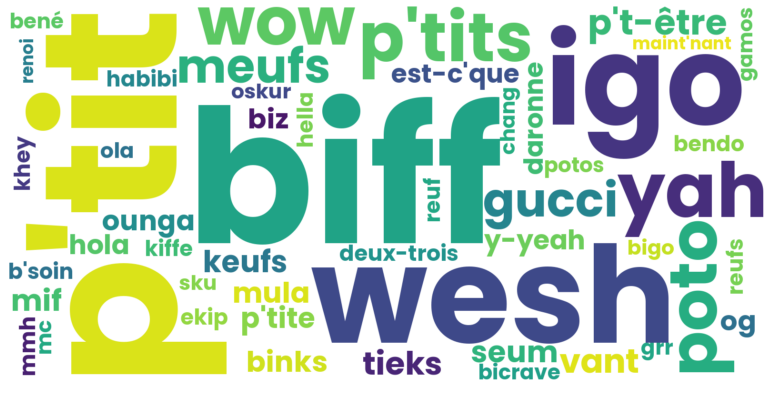

In [21]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Histogramme des mots
Une autre représentation possible de ces mots est en histogramme, voici alors les 30 mots les plus utilisés avec leurs nombres d'occurrence

<AxesSubplot:>

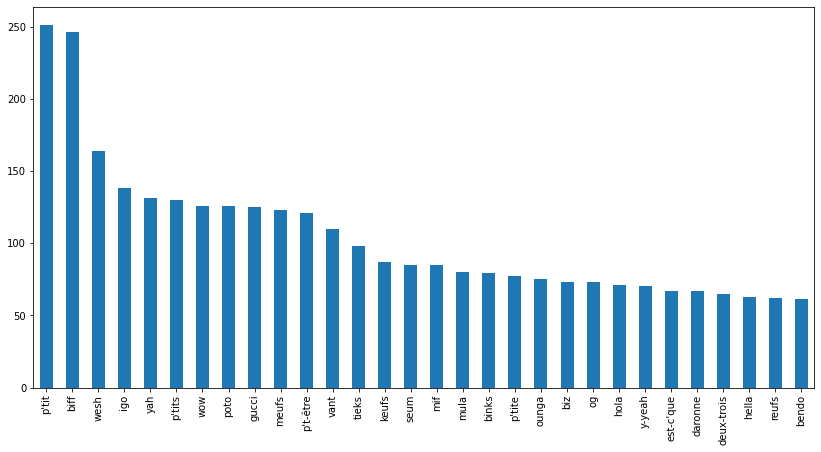

In [22]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Les anglicismes
On va analyser les mots les plus utilisés provenant de l'anglais

In [23]:
english_words = description[description["is_french"] == False]
english_words = english_words[english_words["is_english"] == True]

frequency = pd.Series(english_words["count"], index=english_words.index)

with open("./datas/english_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

english_words

,count,is_french,is_english
yeah,1556,False,True
hey,1002,False,True
fuck,428,False,True
up,285,False,True
the,268,False,True
...,...,...,...
ragga,1,False,True
keef,1,False,True
silver,1,False,True
dashiki,1,False,True


### WordCloud, plus le mot est grand, plus il est utilisé
Voici une représentation des 50 mots en "word-cloud" les plus utilisés figurant dans le dictionnaire anglais

Pour cette représentation on a utilisé le module [WordCloud](https://amueller.github.io/word_cloud/)

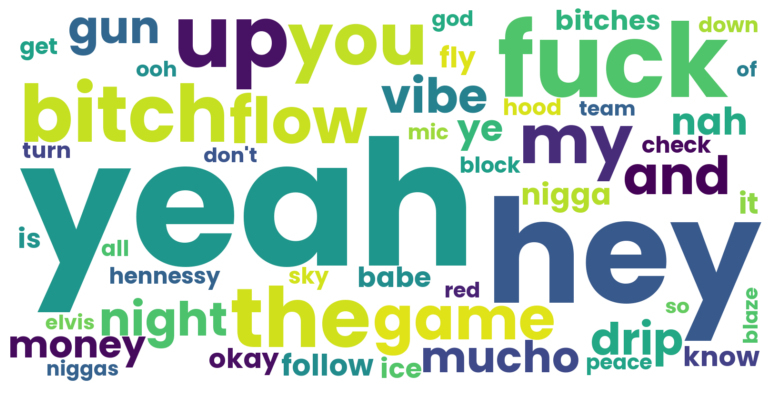

In [24]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Histogramme des mots
Une autre représentation possible de ces mots est en histogramme, voici alors les 30 mots les plus utilisés avec leurs nombres d'occurrence

<AxesSubplot:>

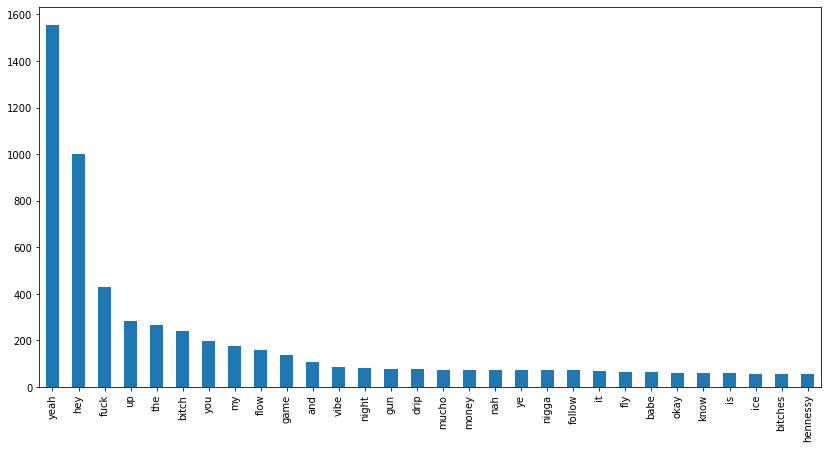

In [25]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Le "vrai" français
On va afficher les mots les plus utilisés figurant uniquement dans le dictionnaire français

In [26]:
french_words = description[description["is_french"] == True]

frequency = pd.Series(french_words["count"], index=french_words.index)

french_words

,count,is_french,is_english
la,16560,True,True
les,11280,True,True
pas,11012,True,True
le,11012,True,True
de,10847,True,True
...,...,...,...
profondes,1,True,False
triples,1,True,True
formera,1,True,False
gallois,1,True,False


### WordCloud, plus le mot est grand, plus il est utilisé
Voici une représentation en "word-cloud" des 50 mots les plus utilisés figurant dans le dictionnaire français

Pour cette représentation on a utilisé le module [WordCloud](https://amueller.github.io/word_cloud/)

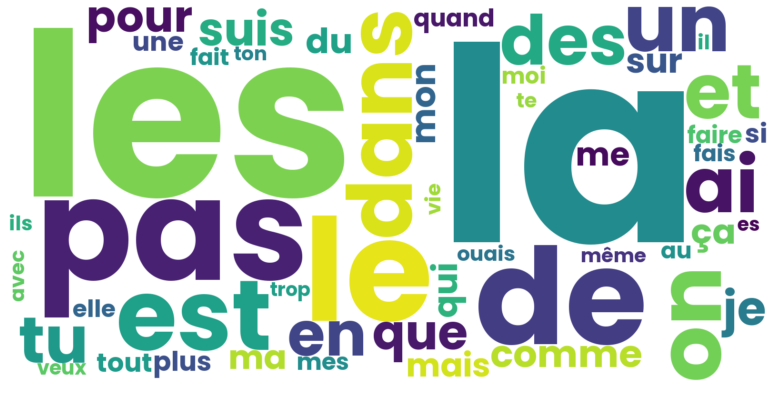

In [27]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Histogramme
Une autre représentation possible de ces mots est en histogramme, voici alors les 30 mots les plus utilisés avec leurs nombres d'occurrence

<AxesSubplot:>

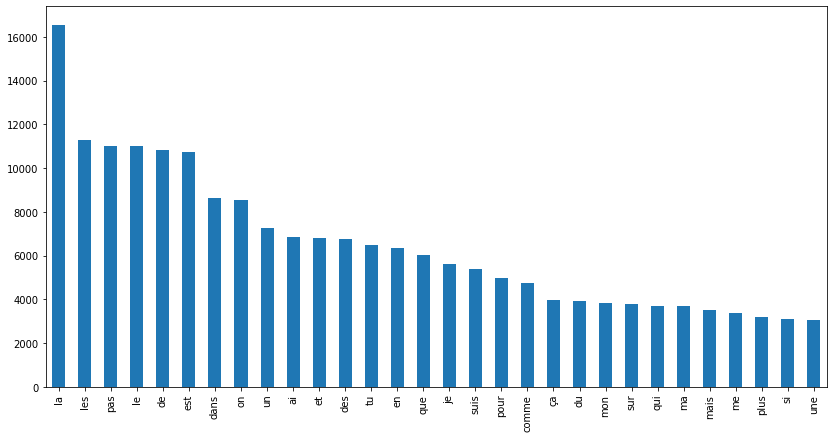

In [28]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Répartition du language
Finalement, il est intéressant d'afficher grâce à un pie chart", la répartition de ces langues/langages

([<matplotlib.patches.Wedge at 0x22881938940>,
 [Text(-0.6401968363575246, 0.8945099276798536, 'French'),
  Text(-0.11489365199287904, -1.0939832945396102, 'English'),
  Text(0.8227494399609057, -0.7301255775851276, 'Other (slang)')],
 [Text(-0.34919827437683154, 0.4879145060071928, ' 69.8%'),
  Text(-0.06266926472338856, -0.5967181606579691, ' 7.1%'),
  Text(0.44877242179685756, -0.3982503150464332, ' 23.1%')])

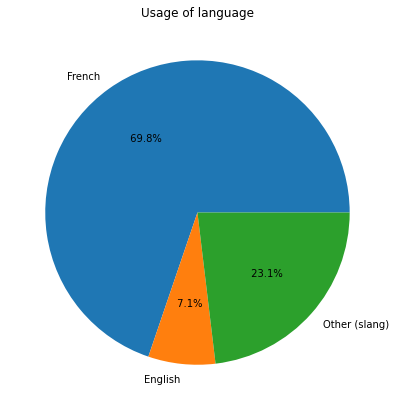

In [29]:
# Count number of words by language
french_words_count = len(description[description["is_french"] == True])
english_words_count = len(english_words)
other_words_count = len(not_french)

datas = [french_words_count, english_words_count, other_words_count]
labels = ["French", "English", "Other (slang)"]

plt.figure(figsize=(14, 7))
plt.title("Usage of language")

plt.pie(datas, labels=labels, autopct='% 1.1f%%')

# Statistiques sur les artistes
Pour le moment on n'a fait que des traitements sur les musiques sans prendre en compte l'artiste, ici on va justement traiter de ceux-ci.

La difficulté est alors de "retourner la chaussette", c'est à dire de regrouper toutes les musiques par leur artiste ou lieu d'avoir une grande liste de musiques non groupée

## Paquets utilisés

In [30]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Regroupement des musiques par artistes
Cette opération est plutôt fastidieuse, on va premièrement créer un champ contenant toutes les informations de l'artiste (dictionnaire) qui va nous permettre de grouper les musiques (par ce champs)

In [31]:
songs = pd.read_json("./datas/songs.json")

songs["lyrics_list"] = songs["lyrics"].apply(lambda x: x.split(" "))

artist_as_dataframe = songs['artist'].apply(pd.Series)
artist_as_dataframe.rename(columns=lambda x: "artist_" + str(x), inplace=True)

album_as_dataframe = songs['album'].apply(pd.Series)
album_as_dataframe.rename(columns=lambda x: "album_" + str(x), inplace=True)

songs = pd.concat([
    artist_as_dataframe,
    album_as_dataframe,
    songs
], axis=1)

songs["artist_dict"] = songs["artist"].apply(lambda x: json.dumps(x))

songs

,artist_name,artist_id,artist_url,artist_image,album_name,album_id,id,name,album,artist,image,url,original_lyrics,date,query,lyrics,lyrics_keywords,lyrics_list,artist_dict
0,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408722,F*cked Up 4,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/5d1737204d5b010efc28...,https://genius.com/Josman-fcked-up-4-lyrics,"[Paroles de ""F*cked Up 4""] [Intro] J.O.S J.O.S...",2021-01-28T00:00:00,josman - f*cked up 4,j o s j o s j o s j o s j o s j o s j o s j o ...,monnaie sur té-c té-c bois le jack sec sec rou...,"[j, o, s, j, o, s, j, o, s, j, o, s, j, o, s, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
1,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408724,Doré,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-dore-lyrics,"[Paroles de ""Doré""] [Refrain] Le ciel est doré...",2021-01-29T00:00:00,josman - doré,le ciel est doré j'allume mon doré j'sais pas ...,le ciel est doré allume mon doré sais pas sur ...,"[le, ciel, est, doré, j'allume, mon, doré, j's...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
2,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408725,Décisions,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-decisions-lyrics,"[Paroles de ""Décisions""] [Couplet 1] J'peux pa...",2021-01-29T00:00:00,josman - décisions,j'peux pas m'afficher j'peux pas paraître ridi...,peux pas afficher peux pas paraître ridicule r...,"[j'peux, pas, m'afficher, j'peux, pas, paraîtr...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
3,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408726,SEC,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-sec-lyrics,"[Paroles de ""SEC""] [Intro] Sec comme le miel, ...",2021-01-29T00:00:00,josman - sec,sec comme le miel yah tu m'verras pas ému même...,sec comme le miel yah tu verras pas ému même s...,"[sec, comme, le, miel, yah, tu, m'verras, pas,...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
4,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408727,New Hares (Same Sh!t),"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-new-hares-same-sh-t-...,"[Paroles de ""New Hares (Same Sh!t)""] [Couplet ...",2021-01-29T00:00:00,josman - new hares (same sh!t),vrai négro gros nez épaté j'lâche des phases i...,vrai négro gros nez épaté lâche des phases ils...,"[vrai, négro, gros, nez, épaté, j'lâche, des, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,Di-Meh,60891,https://genius.com/artists/Di-meh,https://images.genius.com/c618e1678656012159ad...,Mektoub,760403.0,6708599,Follow,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-follow-lyrics,"[Paroles de ""Follow""] [Refrain] Ouais j'y vais...",2021-05-14T00:00:00,di-meh - follow,ouais j'y vais solo qui m'aime me follow qui m...,ouais vais solo qui aime me follow qui aime me...,"[ouais, j'y, vais, solo, qui, m'aime, me, foll...","{""name"": ""Di-Meh"", ""id"": 60891, ""

In [32]:
artists_songs = pd.DataFrame(songs.groupby("artist_dict").apply(lambda g: g.to_dict("records"))).reset_index()

artists_songs.columns = ["artist", "songs"]

artists_songs["artist"] = artists_songs["artist"].apply(lambda x: json.loads(x))

artists = pd.DataFrame.from_dict(artists_songs["artist"].to_dict(), orient="index")

artists["songs"] = artists_songs["songs"]
artists["songs_count"] = artists_songs["songs"].map(lambda x: len(x))

artists = artists.sort_values("songs_count", ascending=False)

artists["artist_id"] = artists["name"].str.lower()
artists.set_index("artist_id", inplace=True)

artists

,name,id,url,image,songs,songs_count
artist_id,,,,,,
pnl,PNL,335710,https://genius.com/artists/Pnl,https://images.genius.com/1518f8e82d8a48060c5e...,"[{'artist_name': 'PNL', 'artist_id': 335710, '...",57
sch,SCH,276476,https://genius.com/artists/Sch,https://images.genius.com/dfa1dc4028ae9d7567cd...,"[{'artist_name': 'SCH', 'artist_id': 276476, '...",54
nekfeu,Nekfeu,13063,https://genius.com/artists/Nekfeu,https://images.genius.com/5f89988a816404d2f29a...,"[{'artist_name': 'Nekfeu', 'artist_id': 13063,...",52
damso,Damso,45855,https://genius.com/artists/Damso,https://images.genius.com/57aa49f445bb856c82f4...,"[{'artist_name': 'Damso', 'artist_id': 45855, ...",50
jul,JuL,74283,https://genius.com/artists/Jul,https://images.genius.com/3d6d65909c61ae6035e8...,"[{'artist_name': 'JuL', 'artist_id': 74283, 'a...",41
lomepal,Lomepal,16138,https://genius.com/artists/Lomepal,https://images.genius.com/cf19fa33f7a1cd3b1dd9...,"[{'artist_name': 'Lomepal', 'artist_id': 16138...",40
orelsan,OrelSan,1286,https://genius.com/artists/Orelsan,https://images.genius.com/e31f6adc3dec9edafab8...,"[{'artist_name': 'OrelSan', 'artist_id': 1286,...",40
booba,Booba,1282,https://genius.com/artists/Booba,https://images.genius.com/f87d62132f88bf91eee1...,"[{'artist_name': 'Booba', 'artist_id': 1282, '...",39
hatik,Hatik,147321,https://genius.com/artists/Hatik,https://images.genius.com/4d36213b4fdb8ef9a77b...,"[{'artist_name': 'Hatik', 'artist_id': 147321,...",38


On obtient ici la liste de tous les artistes avec un champs contenant la liste de ses musiques sous forme de dictionnaire

## Représentation des pertes du au nettoyage des musiques au niveau des artistes
Grâce à ce groupement par artiste on va pouvoir représenter graphiquement les pertes engendrées par le nettoyage du fichier `api_songs.json`

La barre bleue montre le nombre de musiques que l'on voulait récupérer de base, en orange c'est ce que l'on a pu obtenir après le nettoyage des données

<AxesSubplot:xlabel='artist'>

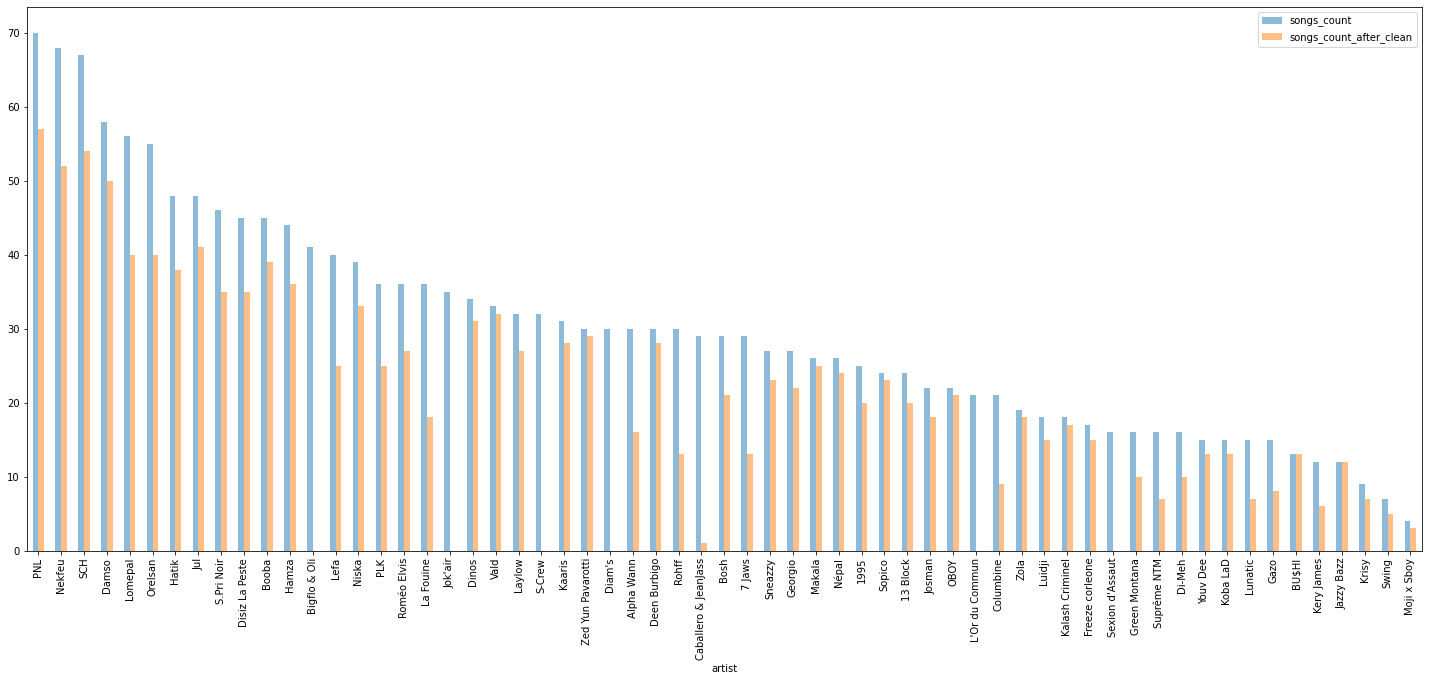

In [33]:
songs_inputs: pd.Series

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    songs_inputs = pd.Series(file.read().splitlines())
    file.close()

songs = songs_inputs.str.split(" - ", expand=True, n=1)
songs.columns = ["artist", "song"]

# Group the songs by artists
artists_comparaison = songs.groupby("artist")["song"].apply(list).reset_index(name="songs")
artists_comparaison["songs_count"] = artists_comparaison["songs"].apply(lambda x: len(x))
artists_comparaison.sort_values(by="songs_count", inplace=True, ascending=False)

artists_comparaison["artist_id"] = artists_comparaison["artist"].str.lower()
artists_comparaison.set_index("artist_id", inplace=True)

artists_comparaison["songs_count_after_clean"] = artists["songs_count"]
artists_comparaison = artists_comparaison[["artist", "songs_count", "songs_count_after_clean"]]

artists_comparaison.plot.bar(alpha=0.5, x="artist", figsize=(25, 10))

## Calcul du pourcentage de répétition
Une statistique plutôt intéressante est de mesurer la richesse du vocabulaire des artistes en montrant lesquels se répètent le plus dans leurs paroles via un histogramme

In [34]:
def select_words(song: dict):
    songs_count = len(song)

    song_df = pd.DataFrame(song)
    words = song_df["lyrics"].map(lambda x: x.split(" ")).explode().to_list()

    return words

def select_unique_words(words: list):
    return pd.Series(words).drop_duplicates().to_list()

# All the used words of the artist
artists["words"] = artists["songs"].map(select_words)
artists["words_count"] = artists["words"].map(lambda x: len(x))

# All the used words os the artist but without duplications
artists["unique_words"] = artists["words"].map(select_unique_words)
artists["unique_words_count"] = artists["unique_words"].map(lambda x: len(x))

# Count the number of repetition
artists["reptition_count"] = artists["words_count"] - artists["unique_words_count"]

# Make a percentage of the repetitions
artists["repetition_percentage"] = artists["reptition_count"] / artists["words_count"] * 100

artists.sort_values(by="repetition_percentage", inplace=True)

artists

,name,id,url,image,songs,songs_count,words,words_count,unique_words,unique_words_count,reptition_count,repetition_percentage
artist_id,,,,,,,,,,,,
columbine,Columbine,315143,https://genius.com/artists/Columbine,https://images.genius.com/1fe7daf087e6825cef60...,"[{'artist_name': 'Columbine', 'artist_id': 315...",9,"[l'enfant, sauvage, l'enfant, terrible, a, les...",3177,"[l'enfant, sauvage, terrible, a, les, bras, éc...",1125,2052,64.589235
rohff,Rohff,1908,https://genius.com/artists/Rohff,https://images.genius.com/e7d85b983e15fcf9b3af...,"[{'artist_name': 'Rohff', 'artist_id': 1908, '...",13,"[comme, le, décès, d, un, proche, j, viens, t,...",9606,"[comme, le, décès, d, un, proche, j, viens, t,...",3247,6359,66.198209
lunatic,Lunatic,1945,https://genius.com/artists/Lunatic,https://images.genius.com/988880b2a371c8ede99a...,"[{'artist_name': 'Lunatic', 'artist_id': 1945,...",7,"[on, n'est, pas, du, même, groupe, sanguin, pa...",4730,"[on, n'est, pas, du, même, groupe, sanguin, cr...",1579,3151,66.617336
jazzy bazz,Jazzy Bazz,13956,https://genius.com/artists/Jazzy-bazz,https://images.genius.com/1404d03558b5bab5530a...,"[{'artist_name': 'Jazzy Bazz', 'artist_id': 13...",12,"[le, soleil, commence, à, décliner, j'aimerais...",4354,"[le, soleil, commence, à, décliner, j'aimerais...",1423,2931,67.317409
suprême ntm,Suprême NTM,24568,https://genius.com/artists/Supreme-ntm,https://images.genius.com/949ffbea5ebe16dd1762...,"[{'artist_name': 'Suprême NTM', 'artist_id': 2...",7,"[à, mon, contact, le, hip-hop, reste, compact,...",4055,"[à, mon, contact, le, hip-hop, reste, compact,...",1250,2805,69.173859
swing,Swing,8444,https://genius.com/artists/Swing,https://images.genius.com/b7403990aa1d693cfd2d...,"[{'artist_name': 'Swing', 'artist_id': 8444, '...",5,"[perdu, dans, la, brousse, au-d'ssus, d, moi, ...",1814,"[perdu, dans, la, brousse, au-d'ssus, d, moi, ...",551,1263,69.625138
kery james,Kery James,1273,https://genius.com/artists/Kery-james,https://images.genius.com/74cf66f613495ab9c902...,"[{'artist_name': 'Kery James', 'artist_id': 12...",6,"[ecoute, de, la, fin, de, si, c, était, à, ref...",4481,"[ecoute, de, la, fin, si, c, était, à, refaire...",1351,3130,69.850480
caballero & jeanjass,Caballero & JeanJass,639298,https://genius.com/artists/Caballero-and-jeanjass,https://images.genius.com/162dab2faa69d8a7035a...,"[{'artist_name': 'Caballero & JeanJass', 'arti...",1,"[put, some, respect, on, my, name, non, non, c...",884,"[put, some, respect, on, my, name, non, c'est,...",265,619,70.022624
1995,1995,12091,https://genius.com/artists/1995,https://images.genius.com/0d0c589a33ca5244d534...,"[{'artist_name': '1995', 'artist_id': 12091, '...",20,"[j, ai, vu, les, pyramides, qui, ondulaient, l...",11708,"[j, ai, vu, les, pyramides, qui, ondulaient, l...",3509,8199,70.029040


## Classement des artistes se répétant du moins au plus

<AxesSubplot:xlabel='name'>

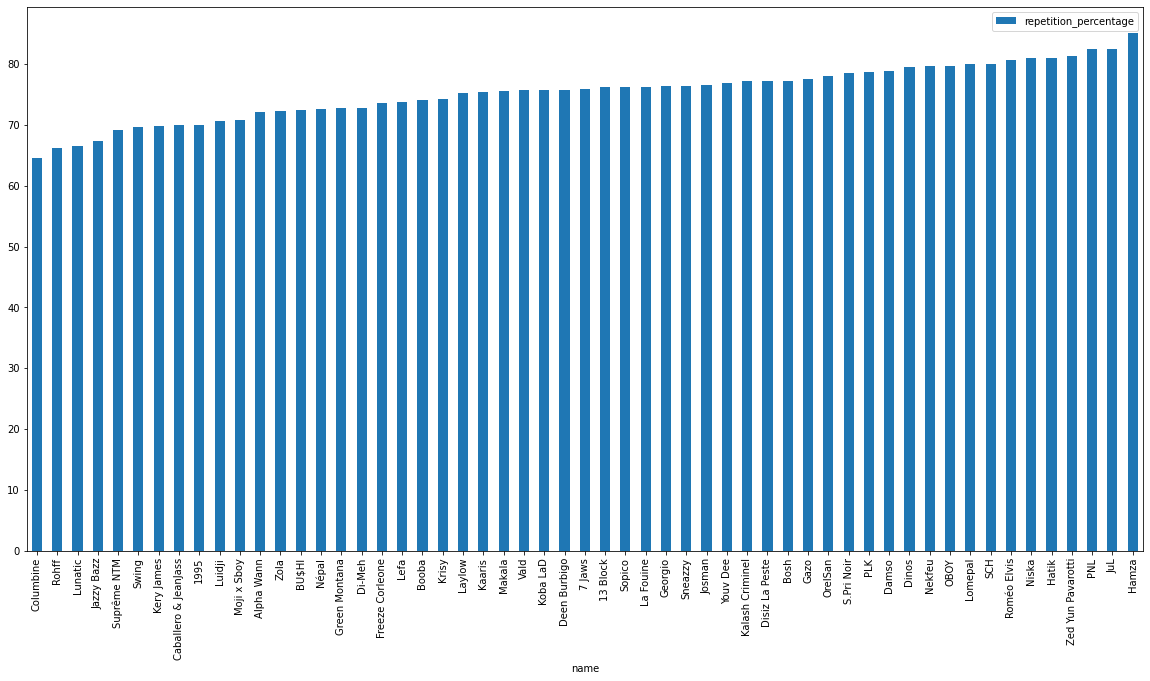

In [35]:
artists.plot(kind="bar", x="name", y="repetition_percentage", figsize=(20, 10))

# Statistiques dans le temps
Nous récupérons également une date sur chacune des musiques, il est alors intéressant d'exploiter cette donnée afin de relever l'évolution du langage dans le temps.

Nous avons choisi, comme représentation statistique de faire un histogramme avec comme axe x les années et en axe y le pourcentage d'utilisation de ce mot durant cette année.

Cette façon de représenter cette donnée statistique peut être contester, il y'a plusieurs manières de le faire, mais celle-ci à l'avantage d'être cohérente. Prenons pour exemple le mot "le", statistiquement il est juste de se dire que l'utilisation de ce mot ne varie pas d'années en années car c'est un mot que l'on peut qualifier d'indispensable pour composer un texte.

Cette statistique, est très intéressantes en dehors de l'aspect mathématique de la chose. On peut étudier, grâce à ça l'évolution des mentalités, analyser les tendances / modes, ainsi que de tracker la création de certains mots.



## Paquets utilisés

In [36]:
import numpy as np
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Regroupement des mots par années

In [37]:
songs = pd.read_json("./datas/songs.json")

songs["year"] = songs["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").year)

songs.sort_values("year", ascending=False, inplace=True)

songs["words"] = songs["lyrics_keywords"].map(lambda x: x.split(" "))

songs = pd.DataFrame(songs.groupby("year")["lyrics_keywords"].apply(list))

songs["lyrics_keywords"] = songs["lyrics_keywords"].str.join(" ")
songs["lyrics_keywords"] = songs["lyrics_keywords"].apply(lambda x: x.split(" "))

songs = songs.reset_index()

songs = songs[songs["year"] > 1900]

songs

,year,lyrics_keywords
2,1998,"[boom, boom, bang, bad, boy, pose, ton, gun, b..."
3,2000,"[hauts-de-seine, alors, comme, ça, on, veut, r..."
4,2001,"[ta-ya, pa, pa-ya, hey, yo, déséquilibre, ta-y..."
5,2004,"[profonde, écriture, comme, faire, un, massage..."
6,2005,"[garde, la, pêche, les, mcs, sont, fauchés, pr..."
7,2006,"[boulouloubi, boulouloubi, bordel, quand, on, ..."
8,2009,"[putain, plus, avance, plus, grandis, plus, co..."
9,2011,"[laisser, la, trace, un, passage, éphémère, di..."
10,2012,"[hé, mais, pourquoi, quand, es, petit, que, es..."
11,2013,"[donne-moi, un, faible, te, ferai, un, fort, d..."


## Affichages de l'utilisation d'un mot par années
Ici vous pouvez simplement taper un mot afin d'afficher son histogramme d'utilisation, comme amélioration il serait intéressant d'afficher également le nombre de musiques l'utilisation afin d'améliorer l'interprétation que l'on peut faire de son utilisation.

Si un artiste utilise un mot beaucoup de fois sur une musique cela peut nous induire en erreur par exemple.

In [38]:
# TODO display the number of songs
# Textbox creation
word_textbox = ipw.Text(value="", placeholder="Search word", description="Word to count:", disabled=False)

songs_count: pd.DataFrame
searched_word: str

def count_word(word: str, words: List[str]):
    words = pd.Series(words)
    return len(words[words == word]) / len(words) * 100

def count_percentage(word: str, words: List[str]):
    words = pd.Series(words)
    return len(words[words == word]) / len(words) * 100

# Function called when the button is clicked
def textbox_changed(word: str):
    searched_word = word
    word_searched = word.lower().strip()

    songs_count = songs
    songs_count["word_count"] = songs_count["lyrics_keywords"].map(lambda x: count_word(word, x))
    songs_count["percentage_of_usage"] = songs_count["lyrics_keywords"].map(lambda x: count_word(word, x))

    songs_count.plot(kind="bar", x="year", y="percentage_of_usage", figsize=(14, 7))

# Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word: str)>

# LIMITATIONS ET PERSPECTIVES

La limitation principale de notre projet est évidemment sur l’échantillons de données que nous avons. Pour ce cas d’école, nous avons tout de même une bonne quantité de données pour les statistiques que nous effectuons. Néanmoins en augmentant encore le nombre de chansons de différents artistes de différentes années, les résultats pourraient être encore plus précis. 
De plus, comme dis précédemment, si on prend un exemple précis comme l’affichage de l’utilisation d’un mot par années. Si un artiste utilise un mot un grand nombre de fois cela peut parfois fausser la statistique. 

L'amélioration la plus intéressante qui pourrait être faite est celle de comparer différents genres musicaux. Comme par exemple, comparer le pourcentage d’utilisation d’un mot particulier dans le rap, rock et la pop. On pourrait également comparer la variété du vocabulaire de différents artistes des différents genres pour voir dans quel style il y a le moins de répétitions de mots. 
Grâce à notre façon de calculer cette statistique, il nous est aisé de d'appliquer cette amélioration. Il suffirait d’ajouter des chansons de différents styles musicales dans le fichier qui contient tous les titres des musiques et qu’il soit aussi disponible sur le site de Genius.

Une autre amélioration envisageable serait de pouvoir ajouter directement une chanson qui sera utilisé dans les statistiques grâce à une interface intégré au notebook. Cela augmentera beaucoup l’utilisation de notre projet pour des utilisateurs moins expérimentés.


Malheureusement nous n’avons pas pu réaliser ces fonctionnalités en raison d'un manque de temps. 



# CONCLUSION

En dehors de la problématique de la récupération des paroles de chansons, nous n'avons pas particulièrement rencontré de trop grosses difficultés lors de la réalisation de ce projet. 
Il nous a permis de nous familiariser avec la « transformation » de données pour les avoir dans le format souhaité. En plus de cela, on a pu avoir une première approche des outils que fournissent le langage python pour réaliser des graphiques. 

Nous avons pu terminer le travail dans les temps. Toutes les fonctionnalités prévues initialement ont pu être réalisé et quelques ajouts ont également été effectué. Nous aurions aimé pouvoir achever complétement le projet avant de le rendre avec les quelques améliorations citées au-dessus mais nous sommes déjà satisfaits du résultat actuel. 

Pour conclure, nous espérons que nous avons pu montrer avec genyus et ses différentes statistiques, la variété et même l’évolution du vocabulaire utilisé dans le rap francophone.


![HE-Arc](medias/he-arc-logo.png)

## Haute-École Arc (Tous droits réservés)